# 019 Calculus Bug Hunt

In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math

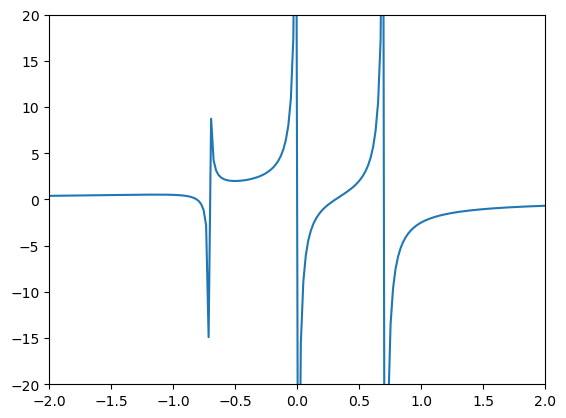

In [7]:
# 1.) Evaluate a function in a range
from sympy.abc import x

fx = (4*x**3 + 2*x**2 -x) / (-4*x**4 + 2*x**2)

xrange = np.linspace(-2,2,200)
fxx = sym.lambdify(x,fx)

plt.plot(xrange,fxx(xrange))
plt.ylim([-20,20])
plt.xlim(xrange[[0,-1]])
plt.show()